# Discretization And Binning with pd.cut()

In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv("Data1/Course_Material_Part2/Video_Lecture_NBs/titanic.csv")

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [4]:
age_bins = [0, 13, 20, 30, 55, 100]

In [5]:
pd.cut(titanic.age, age_bins, right=False) #right here means 0-13  0 inclusive 13 exclusive, 13-20 13 inclusive 20 exclusive

0      [20.0, 30.0)
1      [30.0, 55.0)
2      [20.0, 30.0)
3      [30.0, 55.0)
4      [30.0, 55.0)
           ...     
886    [20.0, 30.0)
887    [13.0, 20.0)
888             NaN
889    [20.0, 30.0)
890    [30.0, 55.0)
Name: age, Length: 891, dtype: category
Categories (5, interval[int64]): [[0, 13) < [13, 20) < [20, 30) < [30, 55) < [55, 100)]

In [6]:
#Checking which age category each passenger belongs to
age_cats = pd.cut(titanic.age, age_bins, right=False)

In [7]:
#Notice here that age_cats is of dtype category
age_cats

0      [20.0, 30.0)
1      [30.0, 55.0)
2      [20.0, 30.0)
3      [30.0, 55.0)
4      [30.0, 55.0)
           ...     
886    [20.0, 30.0)
887    [13.0, 20.0)
888             NaN
889    [20.0, 30.0)
890    [30.0, 55.0)
Name: age, Length: 891, dtype: category
Categories (5, interval[int64]): [[0, 13) < [13, 20) < [20, 30) < [30, 55) < [55, 100)]

In [8]:
age_cats.value_counts()

[30, 55)     288
[20, 30)     220
[13, 20)      95
[0, 13)       69
[55, 100)     42
Name: age, dtype: int64

In [9]:
titanic["age_category"] = age_cats

In [10]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,age_category
0,0,3,male,22.0,1,0,7.2500,S,NaN,"[20.0, 30.0)"
1,1,1,female,38.0,1,0,71.2833,C,C,"[30.0, 55.0)"
2,1,3,female,26.0,0,0,7.9250,S,NaN,"[20.0, 30.0)"
3,1,1,female,35.0,1,0,53.1000,S,C,"[30.0, 55.0)"
4,0,3,male,35.0,0,0,8.0500,S,NaN,"[30.0, 55.0)"
5,0,3,male,NaN,0,0,8.4583,Q,NaN,NaN
6,0,1,male,54.0,0,0,51.8625,S,E,"[30.0, 55.0)"
7,0,3,male,2.0,3,1,21.0750,S,NaN,"[0.0, 13.0)"
8,1,3,female,27.0,0,2,11.1333,S,NaN,"[20.0, 30.0)"
9,1,2,female,14.0,1,0,30.0708,C,NaN,"[13.0, 20.0)"


In [11]:
category_names = ["Kid", "Teenager", "Young_adult", "Adult", "Elderly"]

In [12]:
pd.cut(titanic.age, age_bins, right=False, labels=category_names)

0      Young_adult
1            Adult
2      Young_adult
3            Adult
4            Adult
          ...     
886    Young_adult
887       Teenager
888            NaN
889    Young_adult
890          Adult
Name: age, Length: 891, dtype: category
Categories (5, object): [Kid < Teenager < Young_adult < Adult < Elderly]

In [13]:
titanic["age_category"] = pd.cut(titanic.age, age_bins, right=False, labels=category_names)

In [14]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,age_category
0,0,3,male,22.0,1,0,7.2500,S,NaN,Young_adult
1,1,1,female,38.0,1,0,71.2833,C,C,Adult
2,1,3,female,26.0,0,0,7.9250,S,NaN,Young_adult
3,1,1,female,35.0,1,0,53.1000,S,C,Adult
4,0,3,male,35.0,0,0,8.0500,S,NaN,Adult
5,0,3,male,NaN,0,0,8.4583,Q,NaN,NaN
6,0,1,male,54.0,0,0,51.8625,S,E,Adult
7,0,3,male,2.0,3,1,21.0750,S,NaN,Kid
8,1,3,female,27.0,0,2,11.1333,S,NaN,Young_adult
9,1,2,female,14.0,1,0,30.0708,C,NaN,Teenager


In [15]:
titanic.fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64

In [16]:
pd.cut(titanic.fare, 5, precision=0)

0      (-1.0, 102.0]
1      (-1.0, 102.0]
2      (-1.0, 102.0]
3      (-1.0, 102.0]
4      (-1.0, 102.0]
           ...      
886    (-1.0, 102.0]
887    (-1.0, 102.0]
888    (-1.0, 102.0]
889    (-1.0, 102.0]
890    (-1.0, 102.0]
Name: fare, Length: 891, dtype: category
Categories (5, interval[float64]): [(-1.0, 102.0] < (102.0, 205.0] < (205.0, 307.0] < (307.0, 410.0] < (410.0, 512.0]]

In [17]:
titanic["fare_categories"] = pd.cut(titanic.fare, 5, precision=0)

In [18]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,age_category,fare_categories
0,0,3,male,22.0,1,0,7.2500,S,NaN,Young_adult,"(-1.0, 102.0]"
1,1,1,female,38.0,1,0,71.2833,C,C,Adult,"(-1.0, 102.0]"
2,1,3,female,26.0,0,0,7.9250,S,NaN,Young_adult,"(-1.0, 102.0]"
3,1,1,female,35.0,1,0,53.1000,S,C,Adult,"(-1.0, 102.0]"
4,0,3,male,35.0,0,0,8.0500,S,NaN,Adult,"(-1.0, 102.0]"
5,0,3,male,NaN,0,0,8.4583,Q,NaN,NaN,"(-1.0, 102.0]"
6,0,1,male,54.0,0,0,51.8625,S,E,Adult,"(-1.0, 102.0]"
7,0,3,male,2.0,3,1,21.0750,S,NaN,Kid,"(-1.0, 102.0]"
8,1,3,female,27.0,0,2,11.1333,S,NaN,Young_adult,"(-1.0, 102.0]"
9,1,2,female,14.0,1,0,30.0708,C,NaN,Teenager,"(-1.0, 102.0]"


In [19]:
titanic.fare_categories.value_counts()

(-1.0, 102.0]     838
(102.0, 205.0]     33
(205.0, 307.0]     17
(410.0, 512.0]      3
(307.0, 410.0]      0
Name: fare_categories, dtype: int64

# Discretization And Binning with pd.qcut()

In [20]:
pd.qcut(titanic.fare, 5)

0        (-0.001, 7.854]
1      (39.688, 512.329]
2          (7.854, 10.5]
3      (39.688, 512.329]
4          (7.854, 10.5]
             ...        
886       (10.5, 21.679]
887     (21.679, 39.688]
888     (21.679, 39.688]
889     (21.679, 39.688]
890      (-0.001, 7.854]
Name: fare, Length: 891, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]

In [21]:
titanic["fare_categories"] = pd.qcut(titanic.fare, 5)

In [22]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,age_category,fare_categories
0,0,3,male,22.0,1,0,7.2500,S,NaN,Young_adult,"(-0.001, 7.854]"
1,1,1,female,38.0,1,0,71.2833,C,C,Adult,"(39.688, 512.329]"
2,1,3,female,26.0,0,0,7.9250,S,NaN,Young_adult,"(7.854, 10.5]"
3,1,1,female,35.0,1,0,53.1000,S,C,Adult,"(39.688, 512.329]"
4,0,3,male,35.0,0,0,8.0500,S,NaN,Adult,"(7.854, 10.5]"
5,0,3,male,NaN,0,0,8.4583,Q,NaN,NaN,"(7.854, 10.5]"
6,0,1,male,54.0,0,0,51.8625,S,E,Adult,"(39.688, 512.329]"
7,0,3,male,2.0,3,1,21.0750,S,NaN,Kid,"(10.5, 21.679]"
8,1,3,female,27.0,0,2,11.1333,S,NaN,Young_adult,"(10.5, 21.679]"
9,1,2,female,14.0,1,0,30.0708,C,NaN,Teenager,"(21.679, 39.688]"


In [23]:
titanic.fare_categories.value_counts()

(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: fare_categories, dtype: int64

In [24]:
pd.qcut(titanic.fare, [0, 0.1, 0.25, 0.5, 0.75, 1 ], precision=0)

0        (-0.1, 7.6]
1      (31.0, 512.3]
2        (7.9, 14.5]
3      (31.0, 512.3]
4        (7.9, 14.5]
           ...      
886      (7.9, 14.5]
887     (14.5, 31.0]
888     (14.5, 31.0]
889     (14.5, 31.0]
890       (7.6, 7.9]
Name: fare, Length: 891, dtype: category
Categories (5, interval[float64]): [(-0.1, 7.6] < (7.6, 7.9] < (7.9, 14.5] < (14.5, 31.0] < (31.0, 512.3]]

In [25]:
titanic["fare_categories"] = pd.qcut(titanic.fare, [0, 0.1, 0.25, 0.5, 0.75, 1 ], precision=0)

In [26]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,age_category,fare_categories
0,0,3,male,22.0,1,0,7.2500,S,NaN,Young_adult,"(-0.1, 7.6]"
1,1,1,female,38.0,1,0,71.2833,C,C,Adult,"(31.0, 512.3]"
2,1,3,female,26.0,0,0,7.9250,S,NaN,Young_adult,"(7.9, 14.5]"
3,1,1,female,35.0,1,0,53.1000,S,C,Adult,"(31.0, 512.3]"
4,0,3,male,35.0,0,0,8.0500,S,NaN,Adult,"(7.9, 14.5]"
5,0,3,male,NaN,0,0,8.4583,Q,NaN,NaN,"(7.9, 14.5]"
6,0,1,male,54.0,0,0,51.8625,S,E,Adult,"(31.0, 512.3]"
7,0,3,male,2.0,3,1,21.0750,S,NaN,Kid,"(14.5, 31.0]"
8,1,3,female,27.0,0,2,11.1333,S,NaN,Young_adult,"(7.9, 14.5]"
9,1,2,female,14.0,1,0,30.0708,C,NaN,Teenager,"(14.5, 31.0]"


In [27]:
titanic.fare_categories.value_counts()

(7.9, 14.5]      224
(31.0, 512.3]    222
(14.5, 31.0]     222
(7.6, 7.9]       131
(-0.1, 7.6]       92
Name: fare_categories, dtype: int64

In [28]:
titanic.groupby(["age_category", "fare_categories"]).survived.mean()

age_category  fare_categories
Kid           (-0.1, 7.6]             NaN
              (7.6, 7.9]              NaN
              (7.9, 14.5]        0.888889
              (14.5, 31.0]       0.600000
              (31.0, 512.3]      0.440000
Teenager      (-0.1, 7.6]        0.272727
              (7.6, 7.9]         0.250000
              (7.9, 14.5]        0.419355
              (14.5, 31.0]       0.466667
              (31.0, 512.3]      0.545455
Young_adult   (-0.1, 7.6]        0.269231
              (7.6, 7.9]         0.238095
              (7.9, 14.5]        0.216216
              (14.5, 31.0]       0.526316
              (31.0, 512.3]      0.600000
Adult         (-0.1, 7.6]        0.000000
              (7.6, 7.9]         0.050000
              (7.9, 14.5]        0.320513
              (14.5, 31.0]       0.441558
              (31.0, 512.3]      0.677778
Elderly       (-0.1, 7.6]        0.000000
              (7.6, 7.9]         0.000000
              (7.9, 14.5]        0.250000
    

In [29]:
titanic.groupby(["age_category", "fare_categories"]).survived.mean().unstack()

fare_categories,"(-0.1, 7.6]","(7.6, 7.9]","(7.9, 14.5]","(14.5, 31.0]","(31.0, 512.3]"
age_category,,,,,
Kid,NaN,NaN,0.888889,0.600000,0.440000
Teenager,0.272727,0.250000,0.419355,0.466667,0.545455
Young_adult,0.269231,0.238095,0.216216,0.526316,0.600000
Adult,0.000000,0.050000,0.320513,0.441558,0.677778
Elderly,0.000000,0.000000,0.250000,0.250000,0.470588


# Caps and Floors

In [30]:
import matplotlib.pyplot as plt

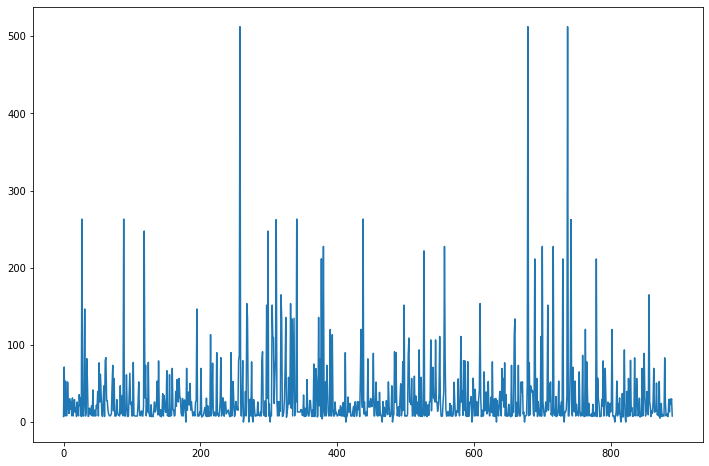

In [31]:
titanic.fare.plot(figsize=(12,8))
plt.show()

In [32]:
titanic.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [33]:
titanic.fare.sort_values(ascending=False)

679    512.3292
258    512.3292
737    512.3292
341    263.0000
438    263.0000
         ...   
277      0.0000
633      0.0000
302      0.0000
597      0.0000
271      0.0000
Name: fare, Length: 891, dtype: float64

In [34]:
fare_cap = 250

In [35]:
#Selecting all rows where fare is greater than our fare cap and overwriting the value to our fare cap
titanic.loc[titanic.fare > fare_cap, "fare"] = fare_cap

In [36]:
fare_floor = 5

In [37]:
#Selecting all rows where fare is less than our fare floor and overwriting the value to our fare floor
titanic.loc[titanic.fare < fare_floor, "fare"] = fare_floor

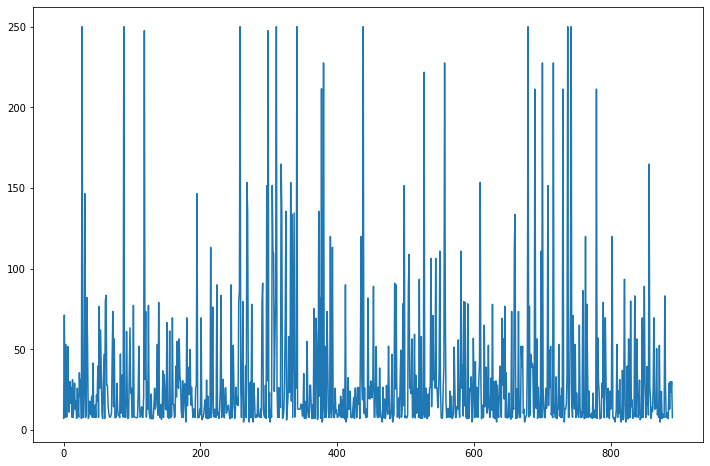

In [38]:
#Inspecting our data after removing the outliers
titanic.fare.plot(figsize=(12,8))
plt.show()

In [39]:
titanic.fare.describe()

count    891.000000
mean      31.320089
std       42.517981
min        5.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      250.000000
Name: fare, dtype: float64

# Scaling / Standardization

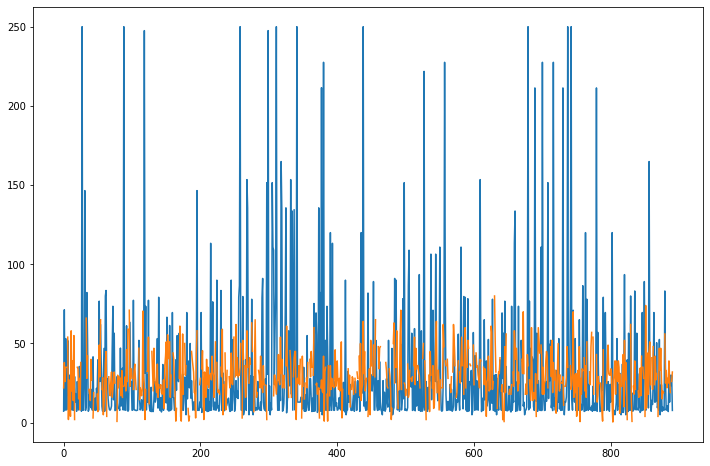

In [40]:
titanic.fare.plot(figsize=(12,8))
titanic.age.plot(figsize=(12,8))
plt.show()

## Scaling and standardizing the two features i.e fare and age

In [41]:
#Step 1 : Calculate the mean
mean_age = titanic.age.mean()
mean_fare = titanic.fare.mean()

In [42]:
#Step 2 : Calculate the standard deviation 
age_std = titanic.age.std()
fare_std = titanic.fare.std()

In [45]:
#Calculating the Z Score
titanic["age_z"] = round((titanic.age - mean_age) / age_std, 2)
titanic["fare_z"] = round((titanic.fare - mean_fare) / fare_std, 2)

In [47]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,age_category,fare_categories,age_z,fare_z
0,0,3,male,22.0,1,0,7.2500,S,NaN,Young_adult,"(-0.1, 7.6]",-0.53,-0.57
1,1,1,female,38.0,1,0,71.2833,C,C,Adult,"(31.0, 512.3]",0.57,0.94
2,1,3,female,26.0,0,0,7.9250,S,NaN,Young_adult,"(7.9, 14.5]",-0.25,-0.55
3,1,1,female,35.0,1,0,53.1000,S,C,Adult,"(31.0, 512.3]",0.36,0.51
4,0,3,male,35.0,0,0,8.0500,S,NaN,Adult,"(7.9, 14.5]",0.36,-0.55
5,0,3,male,NaN,0,0,8.4583,Q,NaN,NaN,"(7.9, 14.5]",NaN,-0.54
6,0,1,male,54.0,0,0,51.8625,S,E,Adult,"(31.0, 512.3]",1.67,0.48
7,0,3,male,2.0,3,1,21.0750,S,NaN,Kid,"(14.5, 31.0]",-1.91,-0.24
8,1,3,female,27.0,0,2,11.1333,S,NaN,Young_adult,"(7.9, 14.5]",-0.19,-0.47
9,1,2,female,14.0,1,0,30.0708,C,NaN,Teenager,"(14.5, 31.0]",-1.08,-0.03


In [50]:
round(titanic.describe(), 2)#Notice how we have standardized our fare and age columns

,survived,pclass,age,sibsp,parch,fare,age_z,fare_z
count,891.00,891.00,714.00,891.00,891.00,891.00,714.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,31.32,-0.00,0.00
std,0.49,0.84,14.53,1.10,0.81,42.52,1.00,1.00
min,0.00,1.00,0.42,0.00,0.00,5.00,-2.02,-0.62
25%,0.00,2.00,20.12,0.00,0.00,7.91,-0.66,-0.55
50%,0.00,3.00,28.00,0.00,0.00,14.45,-0.12,-0.40
75%,1.00,3.00,38.00,1.00,0.00,31.00,0.57,-0.01
max,1.00,3.00,80.00,8.00,6.00,250.00,3.46,5.14


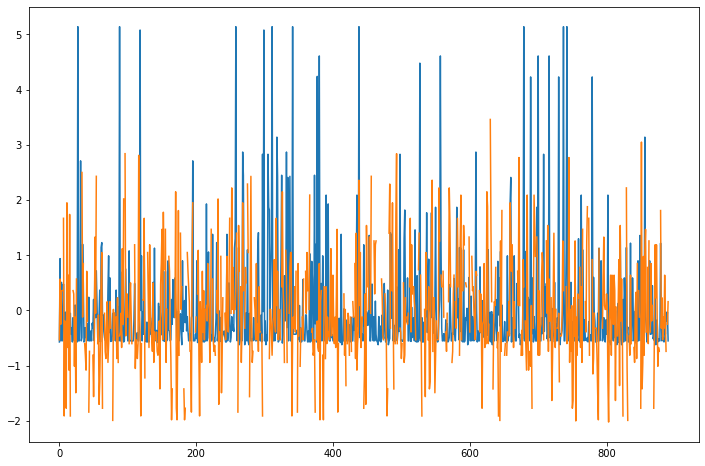

In [52]:
titanic.fare_z.plot(figsize=(12,8))
titanic.age_z.plot(figsize=(12,8))
plt.show()

# Creating dummy variables

In [53]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,age_category,fare_categories,age_z,fare_z
0,0,3,male,22.0,1,0,7.2500,S,NaN,Young_adult,"(-0.1, 7.6]",-0.53,-0.57
1,1,1,female,38.0,1,0,71.2833,C,C,Adult,"(31.0, 512.3]",0.57,0.94
2,1,3,female,26.0,0,0,7.9250,S,NaN,Young_adult,"(7.9, 14.5]",-0.25,-0.55
3,1,1,female,35.0,1,0,53.1000,S,C,Adult,"(31.0, 512.3]",0.36,0.51
4,0,3,male,35.0,0,0,8.0500,S,NaN,Adult,"(7.9, 14.5]",0.36,-0.55


In [54]:
titanic.drop(labels=["deck", "fare_categories", "age_z", "fare_z"], axis=1, inplace=True)

In [55]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,age_category
0,0,3,male,22.0,1,0,7.2500,S,Young_adult
1,1,1,female,38.0,1,0,71.2833,C,Adult
2,1,3,female,26.0,0,0,7.9250,S,Young_adult
3,1,1,female,35.0,1,0,53.1000,S,Adult
4,0,3,male,35.0,0,0,8.0500,S,Adult


In [57]:
#Splitting columns to a numerical category using get_dummies # Notice how we get two columns sex_female and sex_male
pd.get_dummies(titanic, columns=["sex"])

,survived,pclass,age,sibsp,parch,fare,embarked,age_category,sex_female,sex_male
0,0,3,22.0,1,0,7.2500,S,Young_adult,0,1
1,1,1,38.0,1,0,71.2833,C,Adult,1,0
2,1,3,26.0,0,0,7.9250,S,Young_adult,1,0
3,1,1,35.0,1,0,53.1000,S,Adult,1,0
4,0,3,35.0,0,0,8.0500,S,Adult,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,Young_adult,0,1
887,1,1,19.0,0,0,30.0000,S,Teenager,1,0
888,0,3,NaN,1,2,23.4500,S,NaN,1,0
889,1,1,26.0,0,0,30.0000,C,Young_adult,0,1


In [58]:
pd.get_dummies(titanic, columns=["pclass", "age_category"])

,survived,sex,age,sibsp,parch,fare,embarked,pclass_1,pclass_2,pclass_3,age_category_Kid,age_category_Teenager,age_category_Young_adult,age_category_Adult,age_category_Elderly
0,0,male,22.0,1,0,7.2500,S,0,0,1,0,0,1,0,0
1,1,female,38.0,1,0,71.2833,C,1,0,0,0,0,0,1,0
2,1,female,26.0,0,0,7.9250,S,0,0,1,0,0,1,0,0
3,1,female,35.0,1,0,53.1000,S,1,0,0,0,0,0,1,0
4,0,male,35.0,0,0,8.0500,S,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,13.0000,S,0,1,0,0,0,1,0,0
887,1,female,19.0,0,0,30.0000,S,1,0,0,0,1,0,0,0
888,0,female,NaN,1,2,23.4500,S,0,0,1,0,0,0,0,0
889,1,male,26.0,0,0,30.0000,C,1,0,0,0,0,1,0,0
